<a href="https://colab.research.google.com/drive/1VApnUq7mHS8eWXhhuVYYyGCUhGFI-Z0a" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
# Import libraries
%matplotlib inline
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import math
from google.colab.patches import cv2_imshow


Note: When apply this method to high image resolution (7m altitude of flight), `cv2.dilate` and higher `kernel` were applied.


In this stydy were used:

*   7m:

  - `canny = cv2.dilate(canny, (5, 5), iterations=100)`
  - `kernel = np.ones((3,3),np.uint8)`


In [ ]:
%cd '/content/drive/MyDrive/UAS_Beans/Beans_StandCount/2022/SVREC/ByStep/l._Mask_count_Seg-CNN'

img_dir = '/content/drive/MyDrive/UAS_Beans/Beans_StandCount/2022/SVREC/ByStep/l._Mask_count_Seg-CNN/Mask_plot/msk_CNN'
img_dir

if os.path.exists(img_dir):
      img = cv2.imread(img_dir)
else:
      print("Path does not exist:", img_dir)

prefixes = ["2201", "2202"]

img_list = sorted(os.listdir(img_dir))
img_list = [v for v in img_list if v.startswith(tuple(prefixes)) and v.endswith('.png')]
print(img_list)
print(len(img_list))

/content/drive/MyDrive/UAS_Beans/Beans_StandCount/2022/SVREC/ByStep/l._Mask_count_Seg-CNN
['2201_1001_7m_msk.png', '2201_1002_7m_msk.png', '2201_1003_7m_msk.png', '2201_1004_7m_msk.png', '2201_1005_7m_msk.png', '2201_1006_7m_msk.png', '2201_1007_7m_msk.png', '2201_1008_7m_msk.png', '2201_1009_7m_msk.png', '2201_1010_7m_msk.png', '2201_1011_7m_msk.png', '2201_1012_7m_msk.png', '2201_1013_7m_msk.png', '2201_1014_7m_msk.png', '2201_1015_7m_msk.png', '2201_1016_7m_msk.png', '2201_1017_7m_msk.png', '2201_1018_7m_msk.png', '2201_1019_7m_msk.png', '2201_1020_7m_msk.png', '2201_1021_7m_msk.png', '2201_1022_7m_msk.png', '2201_1023_7m_msk.png', '2201_1024_7m_msk.png', '2201_1025_7m_msk.png', '2201_1026_7m_msk.png', '2201_1027_7m_msk.png', '2201_1028_7m_msk.png', '2201_1029_7m_msk.png', '2201_1030_7m_msk.png', '2201_1031_7m_msk.png', '2201_1032_7m_msk.png', '2201_1033_7m_msk.png', '2201_1034_7m_msk.png', '2201_1035_7m_msk.png', '2201_1036_7m_msk.png', '2201_2001_7m_msk.png', '2201_2002_7m_msk.png

In [ ]:
stand_list = []
for img in img_list:
  
  image = cv2.imread(os.path.join(img_dir, img)) 

  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  med_val = np.median(gray)
  lower = int(max(0,0.7*med_val))
  upper = int(min(255, 1.55*med_val))

  blur = cv2.GaussianBlur(gray, (5, 5), 0)
  canny = cv2.Canny(gray, threshold1=lower, threshold2=upper, apertureSize = 3, L2gradient = True)
  canny = cv2.dilate(canny, (5, 5), iterations=100) ## check this!!!

  kernel = np.ones((3,3),np.uint8)
  #canny = canny.copy()
  canny = cv2.morphologyEx(canny, cv2.MORPH_CLOSE, kernel)
  #plt.imshow(img_msk_adj1)

  #canny = cv2.morphologyEx(canny, cv2.MORPH_OPEN, np.ones((1,1),np.uint8))

  (cnt, hierarchy) = cv2.findContours(
  canny.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
  rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  cv2.drawContours(rgb, cnt, -1, (0, 255, 0), 2)
      
  #plt.figure(figsize = (27,10))
  #plt.imshow(rgb, interpolation='nearest')
  stand_list.append([img.split('.')[0], len(cnt)]) ## saving stand count number

  print("Counting: bean plant per plot : ", len(cnt))

stand = np.array(stand_list)
np.savetxt('./SC_7m_M1_pred.csv', stand, delimiter= ',', fmt="%s")

Counting: bean plant per plot :  111
Counting: bean plant per plot :  89
Counting: bean plant per plot :  110
Counting: bean plant per plot :  126
Counting: bean plant per plot :  109
Counting: bean plant per plot :  73
Counting: bean plant per plot :  89
Counting: bean plant per plot :  110
Counting: bean plant per plot :  134
Counting: bean plant per plot :  125
Counting: bean plant per plot :  113
Counting: bean plant per plot :  102
Counting: bean plant per plot :  116
Counting: bean plant per plot :  105
Counting: bean plant per plot :  110
Counting: bean plant per plot :  90
Counting: bean plant per plot :  145
Counting: bean plant per plot :  128
Counting: bean plant per plot :  89
Counting: bean plant per plot :  100
Counting: bean plant per plot :  112
Counting: bean plant per plot :  120
Counting: bean plant per plot :  98
Counting: bean plant per plot :  107
Counting: bean plant per plot :  125
Counting: bean plant per plot :  112
Counting: bean plant per plot :  113
Countin

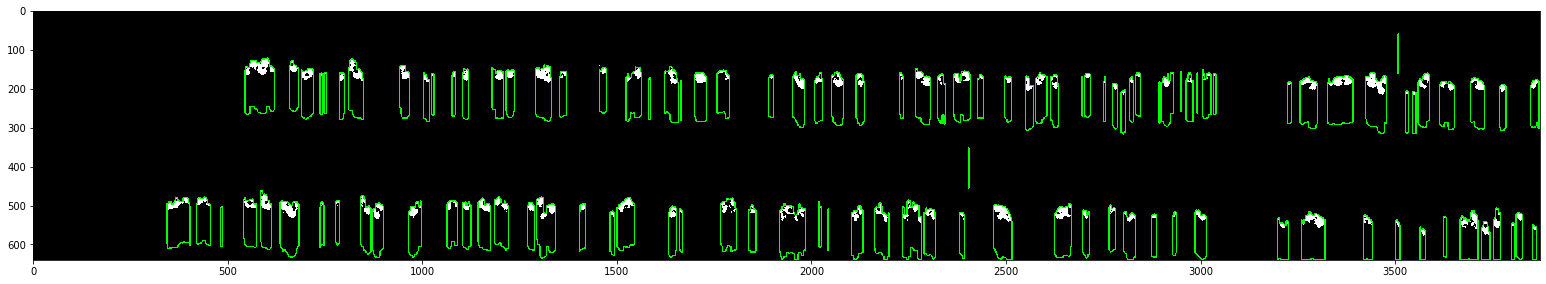

In [ ]:
plt.figure(figsize = (27,10))
plt.imshow(rgb, interpolation='nearest')

In [3]:
# Counting the number of plants
img_rgb = cv2.imread('/content/drive/MyDrive/UAS_Beans/Beans_StandCount/2022/SVREC/ByStep/e._Resize_img_annot/Plots_img/2201_1001_7m.png')
cv2_imshow(img_rgb)

img_msk = cv2.imread('/content/drive/MyDrive/UAS_Beans/Beans_StandCount/2022/SVREC/ByStep/l._Mask_count_Seg-CNN/Mask_plot/msk_CNN/2201_1001_7m_msk.png')
cv2_imshow(img_msk)

gray = cv2.cvtColor(img_msk, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (5, 5), 0)

contours, hierarchy = cv2.findContours(blur,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

count = 0

for i in range(len(contours)):
           
    x, y, w, h = cv2.boundingRect(contours[i])    

    cv2.rectangle(img_rgb, (x, y), (x+w, y+h), (0, 255, 255), 3)
    cv2.drawContours(img_rgb, contours, i, (0, 0, 255), 3)
    
    count += 1

print('Number of bean plants : ', count)

#See how the countours are selected by plotting countours on the actual image.
plt.axis('off')
cv2_imshow(img_rgb)

Output hidden; open in https://colab.research.google.com to view.